In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.kernel_ridge import KernelRidge

In [3]:
anuj_df=pd.read_csv("Cities1.csv")

In [4]:
anuj_df.head()


,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435


In [5]:
anuj_df.tail()

,City,Region,Country,AirQuality,WaterPollution
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000
3959,Cordoba,Andalusia,Spain,85.714286,8.333333
3960,Vic,Catalonia,Spain,100.000000,0.000000
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000
3962,Zamora city,Castile and Leon,Spain,100.000000,50.000000


In [26]:
anuj_df.isnull().sum()

City              0
Region            0
Country           0
AirQuality        0
WaterPollution    0
Cluster           0
dtype: int64

In [27]:
anuj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   int64  
 1   Region          3963 non-null   int64  
 2   Country         3963 non-null   int64  
 3   AirQuality      3963 non-null   float64
 4   WaterPollution  3963 non-null   float64
 5   Cluster         3963 non-null   int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 170.4 KB


In [28]:
anuj_df.drop(columns=['Region'], inplace=True)


In [29]:
anuj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   int64  
 1   Country         3963 non-null   int64  
 2   AirQuality      3963 non-null   float64
 3   WaterPollution  3963 non-null   float64
 4   Cluster         3963 non-null   int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 139.5 KB


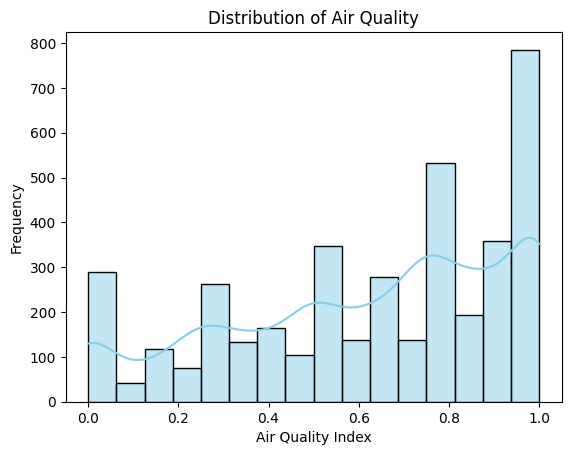

In [30]:
sns.histplot(anuj_df['AirQuality'], kde=True, color='skyblue')
plt.title('Distribution of Air Quality')
plt.xlabel('Air Quality Index')
plt.ylabel('Frequency')
plt.show()


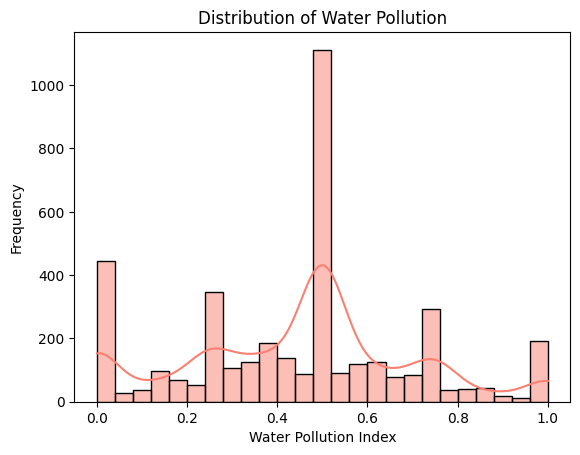

In [31]:
sns.histplot(anuj_df['WaterPollution'], kde=True, color='salmon')
plt.title('Distribution of Water Pollution')
plt.xlabel('Water Pollution Index')
plt.ylabel('Frequency')
plt.show()


In [39]:
le_city = LabelEncoder()
anuj_df['City'] = le_city.fit_transform(anuj_df['City'])


In [45]:
anuj_df['City'] = le_city.inverse_transform(anuj_df['City'])


In [47]:
print(anuj_df.head())
print(anuj_df.columns)
print(anuj_df.dtypes)


   City  Country  AirQuality  WaterPollution  Cluster
0  2284      168    0.468160        0.495050        2
1  3574      168    0.661290        0.491071        0
2  2874      168    0.605140        0.430000        0
3   371       54    0.623641        0.286127        1
4  1914      168    0.366216        0.612994        2
Index(['City', 'Country', 'AirQuality', 'WaterPollution', 'Cluster'], dtype='object')
City                int64
Country             int64
AirQuality        float64
WaterPollution    float64
Cluster             int32
dtype: object


In [48]:
le_city = LabelEncoder()
anuj_df['City'] = le_city.fit_transform(anuj_df['City'])
anuj_df['City'] = le_city.inverse_transform(anuj_df['City'])


In [49]:
print(anuj_df.head())
print(anuj_df.columns)
print(anuj_df.dtypes)


   City  Country  AirQuality  WaterPollution  Cluster
0  2284      168    0.468160        0.495050        2
1  3574      168    0.661290        0.491071        0
2  2874      168    0.605140        0.430000        0
3   371       54    0.623641        0.286127        1
4  1914      168    0.366216        0.612994        2
Index(['City', 'Country', 'AirQuality', 'WaterPollution', 'Cluster'], dtype='object')
City                int64
Country             int64
AirQuality        float64
WaterPollution    float64
Cluster             int32
dtype: object


In [50]:
anuj_df = pd.read_csv('Cities1.csv')


In [51]:
print(anuj_df.head())
print(anuj_df.columns)
print(anuj_df.dtypes)


               City                Region                   Country  \
0     New York City              New York  United States of America   
1  Washington, D.C.  District of Columbia  United States of America   
2     San Francisco            California  United States of America   
3            Berlin                   NaN                   Germany   
4       Los Angeles            California  United States of America   

   AirQuality  WaterPollution  
0   46.816038       49.504950  
1   66.129032       49.107143  
2   60.514019       43.000000  
3   62.364130       28.612717  
4   36.621622       61.299435  
Index(['City', 'Region', 'Country', 'AirQuality', 'WaterPollution'], dtype='object')
City               object
Region             object
Country            object
AirQuality        float64
WaterPollution    float64
dtype: object


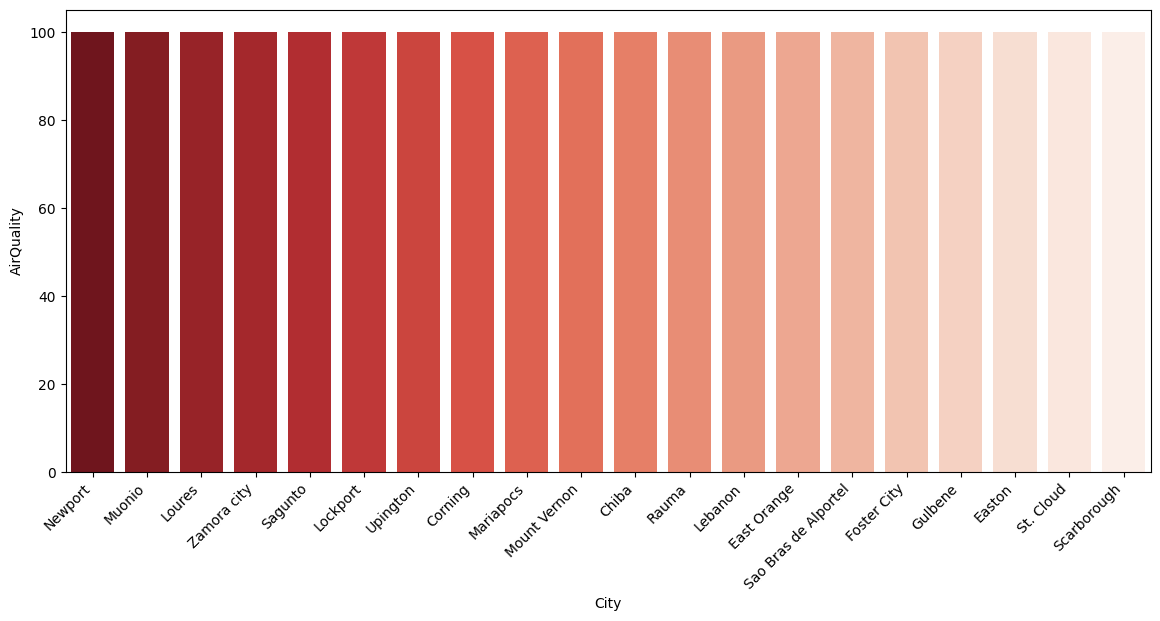

In [52]:
top20_air_pollution = anuj_df.sort_values(by='AirQuality', ascending=False).head(20)
plt.figure(figsize=(14,6))
sns.barplot(x='City', y='AirQuality', data=top20_air_pollution, palette='Reds_r')
plt.xticks(rotation=45, ha='right')
plt.show()
